In [96]:
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer

In [97]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('turkish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [99]:
df = pd.read_csv('president_speech.csv')

df

,Unnamed: 0,text,start,duration
0,0,Aziz milletim,1.439,3.900
1,1,değerli kardeşlerim,3.300,4.860
2,2,sizlere en kalbi duygularımla muhabbetle,5.339,6.380
3,3,selamlıyorum mübarek Ramazan bayramınızı,8.160,6.899
4,4,canı gönülden tebrik ediyorum Başı,11.719,7.060
...,...,...,...,...
92,92,vatandaşlarıma Şimdiden teşekkür,270.080,5.700
93,93,ediyorum bayramınız mübarek,272.699,6.201
94,94,gönülleriniz Şen umutlarınız diri,275.780,6.520
95,95,Geleceğiniz aydınlık olsun Kalın,278.900,6.400


In [100]:
textlist = df['text'].to_list()

In [101]:
textlist[1].split(" ") #check

['değerli', 'kardeşlerim']

In [102]:
new_list = list()

In [103]:
for i in textlist:
    for i in i.split(" "):
        new_list.append(i)
    

In [104]:
print(new_list)

['Aziz', 'milletim', 'değerli', 'kardeşlerim', 'sizlere', 'en', 'kalbi', 'duygularımla', 'muhabbetle', 'selamlıyorum', 'mübarek', 'Ramazan', 'bayramınızı', 'canı', 'gönülden', 'tebrik', 'ediyorum', 'Başı', 'rahmet', 'ortası', 'mağfiret', 'sonu', 'ebedi', 'azaptan', 'Kurtuluş', 'olan', 'bir', 'ramazan-ı', 'Şerifi', 'daha', 'geride', 'bıraktık', 'Rabbime', 'bizleri', 'sağlıkla', 'afiyetle', 've', 'sevdiklerimizle', 'birlikte', 'bir', 'Bayrama', 'daha', 'ulaştırdığı', 'için', 'hamd', 'ediyorum', 'bu', 'sene', '6', 'Şubat', 'depremlerinde', 'yitirdiğimiz', 'canların', 'acısı', 'sebebiyle', 'Ramazan', 'ayını', 'buruk', 'karşıladık', 'buruk', 'geçirdik', 'depremlerde', 've', 'sellerde', 'vefat', 'eden', '50', 'bina', 'Aşkın', 'insanımızın', 'her', 'birine', 'bir', 'kez', 'daha', "Allah'tan", 'rahmet', 'yakınlarına', 'sabır', 'diliyorum', 'milletçe', 'Hepimizin', 'bir', 'kez', 'daha', 'başı', 'sağ', 'olsun', 'inancımıza', 'göre', 'depremlerde', 'sellerde', 'Yangınlarda', 've', 'insan', 'irade

In [105]:
words_df = pd.DataFrame(new_list, columns = ['words'])
words_df

,words
0,Aziz
1,milletim
2,değerli
3,kardeşlerim
4,sizlere
...,...
425,Geleceğiniz
426,aydınlık
427,olsun
428,Kalın


In [106]:
textlist[10:20] #text check


['daha ulaştırdığı için hamd ediyorum bu',
 'sene 6 Şubat depremlerinde yitirdiğimiz',
 'canların acısı sebebiyle Ramazan ayını',
 'buruk karşıladık buruk geçirdik',
 'depremlerde ve sellerde vefat eden 50',
 'bina Aşkın insanımızın her birine bir',
 "kez daha Allah'tan rahmet yakınlarına",
 'sabır diliyorum',
 'milletçe Hepimizin bir kez daha başı sağ',
 'olsun inancımıza göre depremlerde']

In [107]:
df['text'] = df['text'].astype(str).str.lower()
df.head(3)

,Unnamed: 0,text,start,duration
0,0,aziz milletim,1.439,3.90
1,1,değerli kardeşlerim,3.300,4.86
2,2,sizlere en kalbi duygularımla muhabbetle,5.339,6.38


In [108]:
regexp = RegexpTokenizer('\w+')

df['text_token']=df['text'].apply(regexp.tokenize)
df.head(3)

,Unnamed: 0,text,start,duration,text_token
0,0,aziz milletim,1.439,3.90,"[aziz, milletim]"
1,1,değerli kardeşlerim,3.300,4.86,"[değerli, kardeşlerim]"
2,2,sizlere en kalbi duygularımla muhabbetle,5.339,6.38,"[sizlere, en, kalbi, duygularımla, muhabbetle]"


In [109]:
stopwords = nltk.corpus.stopwords.words("turkish")
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
words_df.head(10)

,words
0,Aziz
1,milletim
2,değerli
3,kardeşlerim
4,sizlere
5,en
6,kalbi
7,duygularımla
8,muhabbetle
9,selamlıyorum


In [110]:
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [111]:
df[['text', 'text_token', 'text_string']].head()

,text,text_token,text_string
0,aziz milletim,"[aziz, milletim]",aziz milletim
1,değerli kardeşlerim,"[değerli, kardeşlerim]",değerli kardeşlerim
2,sizlere en kalbi duygularımla muhabbetle,"[sizlere, kalbi, duygularımla, muhabbetle]",sizlere kalbi duygularımla muhabbetle
3,selamlıyorum mübarek ramazan bayramınızı,"[selamlıyorum, mübarek, ramazan, bayramınızı]",selamlıyorum mübarek ramazan bayramınızı
4,canı gönülden tebrik ediyorum başı,"[canı, gönülden, tebrik, ediyorum, başı]",canı gönülden tebrik ediyorum başı


In [112]:
type(df['text'])

pandas.core.series.Series

In [113]:
all_words = ' '.join([word for word in df['text_string']])
all_words

'aziz milletim değerli kardeşlerim sizlere kalbi duygularımla muhabbetle selamlıyorum mübarek ramazan bayramınızı canı gönülden tebrik ediyorum başı rahmet ortası mağfiret sonu ebedi azaptan kurtuluş olan bir ramazan şerifi geride bıraktık rabbime bizleri sağlıkla afiyetle sevdiklerimizle birlikte bir bayrama ulaştırdığı hamd ediyorum sene şubat depremlerinde yitirdiğimiz canların acısı sebebiyle ramazan ayını buruk karşıladık buruk geçirdik depremlerde sellerde vefat eden bina aşkın insanımızın birine bir allah tan rahmet yakınlarına sabır diliyorum milletçe hepimizin bir başı sağ olsun inancımıza göre depremlerde sellerde yangınlarda insan iradesini aşan afetlerde vefat edenler hükmen şehit sayılmaktadır depremlerde hayatını kaybeden kardeşlerimizin ahirette aziz şehitlerimizle beraber haşrolacaklarına inanıyoruz rahmet bereket yardımlaşma ayı olan ramazan manevi iklimini güzel şekilde teneffüs etmek birlikte gayret gösterdik mübarek günlerde özellikle deprem zedelerimizi yalnız bıra

In [114]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)
tokenized_words

['aziz',
 'milletim',
 'değerli',
 'kardeşlerim',
 'sizlere',
 'kalbi',
 'duygularımla',
 'muhabbetle',
 'selamlıyorum',
 'mübarek',
 'ramazan',
 'bayramınızı',
 'canı',
 'gönülden',
 'tebrik',
 'ediyorum',
 'başı',
 'rahmet',
 'ortası',
 'mağfiret',
 'sonu',
 'ebedi',
 'azaptan',
 'kurtuluş',
 'olan',
 'bir',
 'ramazan',
 'şerifi',
 'geride',
 'bıraktık',
 'rabbime',
 'bizleri',
 'sağlıkla',
 'afiyetle',
 'sevdiklerimizle',
 'birlikte',
 'bir',
 'bayrama',
 'ulaştırdığı',
 'hamd',
 'ediyorum',
 'sene',
 'şubat',
 'depremlerinde',
 'yitirdiğimiz',
 'canların',
 'acısı',
 'sebebiyle',
 'ramazan',
 'ayını',
 'buruk',
 'karşıladık',
 'buruk',
 'geçirdik',
 'depremlerde',
 'sellerde',
 'vefat',
 'eden',
 'bina',
 'aşkın',
 'insanımızın',
 'birine',
 'bir',
 'allah',
 'tan',
 'rahmet',
 'yakınlarına',
 'sabır',
 'diliyorum',
 'milletçe',
 'hepimizin',
 'bir',
 'başı',
 'sağ',
 'olsun',
 'inancımıza',
 'göre',
 'depremlerde',
 'sellerde',
 'yangınlarda',
 'insan',
 'iradesini',
 'aşan',
 'af

In [115]:
from nltk.probability import FreqDist


In [116]:
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'bir': 9, 'deprem': 8, 'ramazan': 4, 'mübarek': 3, 'ediyorum': 3, 'rahmet': 3, 'birlikte': 3, 'depremlerde': 3, 'inanıyoruz': 3, 'yeni': 3, ...})

In [117]:
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
df

,Unnamed: 0,text,start,duration,text_token,text_string,text_string_fdist
0,0,aziz milletim,1.439,3.900,"[aziz, milletim]",aziz milletim,aziz milletim
1,1,değerli kardeşlerim,3.300,4.860,"[değerli, kardeşlerim]",değerli kardeşlerim,değerli kardeşlerim
2,2,sizlere en kalbi duygularımla muhabbetle,5.339,6.380,"[sizlere, kalbi, duygularımla, muhabbetle]",sizlere kalbi duygularımla muhabbetle,sizlere kalbi duygularımla muhabbetle
3,3,selamlıyorum mübarek ramazan bayramınızı,8.160,6.899,"[selamlıyorum, mübarek, ramazan, bayramınızı]",selamlıyorum mübarek ramazan bayramınızı,selamlıyorum mübarek ramazan bayramınızı
4,4,canı gönülden tebrik ediyorum başı,11.719,7.060,"[canı, gönülden, tebrik, ediyorum, başı]",canı gönülden tebrik ediyorum başı,canı gönülden tebrik ediyorum başı
...,...,...,...,...,...,...,...
92,92,vatandaşlarıma şimdiden teşekkür,270.080,5.700,"[vatandaşlarıma, şimdiden, teşekkür]",vatandaşlarıma şimdiden teşekkür,vatandaşlarıma şimdiden teşekkür
93,93,ediyorum bayramınız mübarek,272.699,6.201,"[ediyorum, bayramınız, mübarek]",ediyorum bayramınız mübarek,ediyorum bayramınız mübarek
94,94,gönülleriniz şen umutlarınız diri,275.780,6.520,"[gönülleriniz, şen, umutlarınız, diri]",gönülleriniz şen umutlarınız diri,gönülleriniz şen umutlarınız diri
95,95,geleceğiniz aydınlık olsun kalın,278.900,6.400,"[geleceğiniz, aydınlık, olsun, kalın]",geleceğiniz aydınlık olsun kalın,geleceğiniz aydınlık olsun kalın


In [118]:
df.columns

Index(['Unnamed: 0', 'text', 'start', 'duration', 'text_token', 'text_string',
       'text_string_fdist'],
      dtype='object')

In [119]:
df.drop(['Unnamed: 0', 'start', 'duration'], axis = 1, inplace = True)

In [120]:
df

,text,text_token,text_string,text_string_fdist
0,aziz milletim,"[aziz, milletim]",aziz milletim,aziz milletim
1,değerli kardeşlerim,"[değerli, kardeşlerim]",değerli kardeşlerim,değerli kardeşlerim
2,sizlere en kalbi duygularımla muhabbetle,"[sizlere, kalbi, duygularımla, muhabbetle]",sizlere kalbi duygularımla muhabbetle,sizlere kalbi duygularımla muhabbetle
3,selamlıyorum mübarek ramazan bayramınızı,"[selamlıyorum, mübarek, ramazan, bayramınızı]",selamlıyorum mübarek ramazan bayramınızı,selamlıyorum mübarek ramazan bayramınızı
4,canı gönülden tebrik ediyorum başı,"[canı, gönülden, tebrik, ediyorum, başı]",canı gönülden tebrik ediyorum başı,canı gönülden tebrik ediyorum başı
...,...,...,...,...
92,vatandaşlarıma şimdiden teşekkür,"[vatandaşlarıma, şimdiden, teşekkür]",vatandaşlarıma şimdiden teşekkür,vatandaşlarıma şimdiden teşekkür
93,ediyorum bayramınız mübarek,"[ediyorum, bayramınız, mübarek]",ediyorum bayramınız mübarek,ediyorum bayramınız mübarek
94,gönülleriniz şen umutlarınız diri,"[gönülleriniz, şen, umutlarınız, diri]",gönülleriniz şen umutlarınız diri,gönülleriniz şen umutlarınız diri
95,geleceğiniz aydınlık olsun kalın,"[geleceğiniz, aydınlık, olsun, kalın]",geleceğiniz aydınlık olsun kalın,geleceğiniz aydınlık olsun kalın


In [121]:
words_df['words'].values

array(['Aziz', 'milletim', 'değerli', 'kardeşlerim', 'sizlere', 'en',
       'kalbi', 'duygularımla', 'muhabbetle', 'selamlıyorum', 'mübarek',
       'Ramazan', 'bayramınızı', 'canı', 'gönülden', 'tebrik', 'ediyorum',
       'Başı', 'rahmet', 'ortası', 'mağfiret', 'sonu', 'ebedi', 'azaptan',
       'Kurtuluş', 'olan', 'bir', 'ramazan-ı', 'Şerifi', 'daha', 'geride',
       'bıraktık', 'Rabbime', 'bizleri', 'sağlıkla', 'afiyetle', 've',
       'sevdiklerimizle', 'birlikte', 'bir', 'Bayrama', 'daha',
       'ulaştırdığı', 'için', 'hamd', 'ediyorum', 'bu', 'sene', '6',
       'Şubat', 'depremlerinde', 'yitirdiğimiz', 'canların', 'acısı',
       'sebebiyle', 'Ramazan', 'ayını', 'buruk', 'karşıladık', 'buruk',
       'geçirdik', 'depremlerde', 've', 'sellerde', 'vefat', 'eden', '50',
       'bina', 'Aşkın', 'insanımızın', 'her', 'birine', 'bir', 'kez',
       'daha', "Allah'tan", 'rahmet', 'yakınlarına', 'sabır', 'diliyorum',
       'milletçe', 'Hepimizin', 'bir', 'kez', 'daha', 'başı', 'sağ

In [122]:
w_cloud = pd.DataFrame(tokenized_words, columns = ['words'])
#number_of_rep = pd.DataFrame(w_cloud, w_cloud.value_counts(), columns = ['words'])
number_of_rep = pd.DataFrame(w_cloud.value_counts().head(20).to_frame())
number_of_rep.head(20)

,0
words,
bir,9
deprem,8
ramazan,4
ediyorum,3
yerine,3
yeni,3
milletimizin,3
depremlerde,3
birlikte,3


In [123]:
number_of_rep = pd.DataFrame(number_of_rep.T)
#number_of_rep.T 

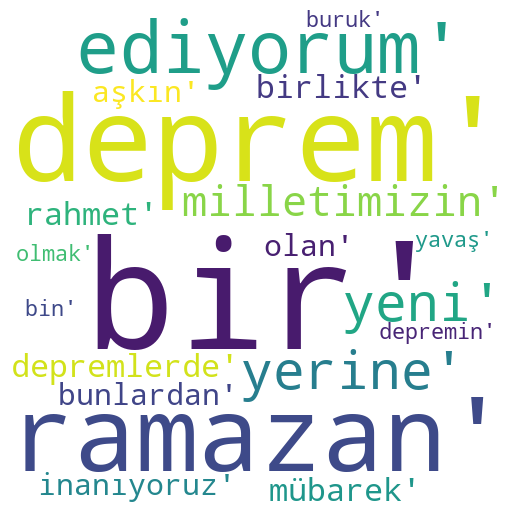

In [124]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in number_of_rep:
      
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()